In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
features = data.data
target = data.target

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
mms = MinMaxScaler()
features = mms.fit_transform(features)

In [5]:
from keras.utils.np_utils import to_categorical

In [6]:
target = to_categorical(target)
target.shape

(150, 3)

In [7]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(features, target, random_state = 2)
ytest.shape

(38, 3)

In [8]:
model = Sequential()
model.add(Dense(100, input_dim = 4, activation = "relu"))
model.add(Dense(60, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

In [9]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
history = model.fit(xtrain, ytrain, batch_size = 30, epochs = 50, validation_data = (xtest, ytest))

native : compiler/mlir/mlir_graph_optimization_pass.cc:185 None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
4/4 [==============================] - 2s 153ms/step - loss: 0.7037 - accuracy: 0.0804 - val_loss: 0.6893 - val_accuracy: 0.2368
Epoch 2/50
4/4 [==============================] - 0s 36ms/step - loss: 0.6810 - accuracy: 0.4464 - val_loss: 0.6708 - val_accuracy: 0.7105
Epoch 3/50
4/4 [==============================] - 0s 36ms/step - loss: 0.6632 - accuracy: 0.6518 - val_loss: 0.6539 - val_accuracy: 0.7105
Epoch 4/50
4/4 [==============================] - 0s 29ms/step - loss: 0.6469 - accuracy: 0.6518 - val_loss: 0.6376 - val_accuracy: 0.7105
Epoch 5/50
4/4 [==============================] - 0s 48ms/step - loss: 0.6313 - accuracy: 0.6518 - val_loss: 0.6216 - val_accuracy: 0.7105
Epoch 6/50
4/4 [==============================] - 0s 38ms/step - loss: 0.6159 - accuracy: 0.6518 - val_loss: 0.6061 - val_accuracy: 0.7105
Epoch 7/50
4/4 [==============================] - 0s 49ms/step - loss: 0.6009 - accuracy: 0.6518 - val_loss: 0.5904 - val_accuracy: 0.7105
Epoch 8/50
4/4 [==========

In [11]:
results = model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 12ms/step - loss: 0.1859 - accuracy: 0.9474


In [12]:
for a, b in zip(model.metrics_names, results):
    print(a, ": ", b)

loss :  0.18585212528705597
accuracy :  0.9473684430122375


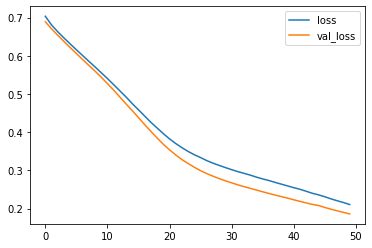

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

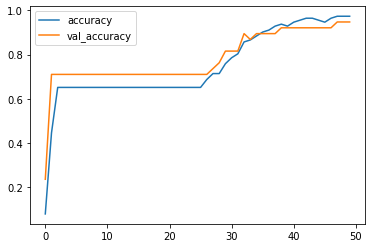

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [15]:
model.save("iris_classification_model.h5")

In [16]:
pred = model.predict(xtest)

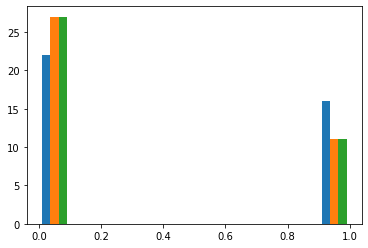

In [22]:
plt.hist(ytest)
plt.show()

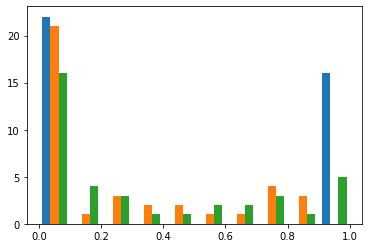

In [19]:
plt.hist(pred)
plt.show()